In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import astropy.coordinates as coord
import astropy.units as u

In [12]:
targets = ['gjoll_4', 'gjoll_5']
periods = [0.5687630691850727, 0.5514245773501661]
t0s = [1717.0683591970514, 1712.462682561468]

In [13]:
# UTC is 6 hours ahead of McDonald Observatory
# start is 6pm local on 2019-01-11, end is 8am local on 2019-01-18
local = Time(['2020-02-07 18:00:00.000',
              '2020-02-11 08:00:00.000'], format='iso', scale='utc')
run = local + 6*u.hr
start, end = run.to_value('jd')

# phases when we want to observe
keys = ['min', 'best-start', 'best-end', 'okay-start', 'okay-end', 'opt-35']
vals = [0.83, 0.74, 0.88, 0.53, 0.9, 0.35]

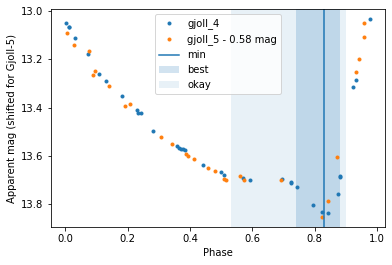

In [14]:
for target, period, t0 in zip(targets, periods, t0s):
    df = pd.read_csv(target+'.csv')
    df['phase_time'] = ((df['time'] - t0) % period)/period
    sel = df['band'] == 'G'
    label = 'gjoll_5 - 0.58 mag' if target == 'gjoll_5' else target
    if target == 'gjoll_5':
        df['mag'] -= 0.58
    plt.plot(df[sel]['phase_time'], df[sel]['mag'], '.', label=label)
plt.axvline(0.83, label='min')
plt.axvspan(0.74, 0.88, alpha=0.2, label='best')
plt.axvspan(0.53, 0.9, alpha=0.1, label='okay')
plt.legend(loc='best')
plt.xlabel('Phase')
plt.ylabel('Apparent mag (shifted for Gjoll-5)')
plt.gca().invert_yaxis();

In [15]:
for target, period, t0 in zip(targets, periods, t0s):
    df = pd.read_csv(target+'.csv')
    result = pd.DataFrame()
    for key, val in zip(keys, vals):
        times = t0 + 2455197.5 + (val + np.arange(4000))*period
        t = Time(times, format='jd', scale='tcb')
        result[key] = t.to_value('iso')
    sel = (t.to_value('jd') > start) & (t.to_value('jd') < end)
    result[sel].to_csv(target+'_times_februn.csv', index=False)
result[sel]

,min,best-start,best-end,okay-start,okay-end,opt-35
3586,2020-02-08 07:53:36.903,2020-02-08 06:42:09.025,2020-02-08 08:33:19.057,2020-02-08 03:55:23.978,2020-02-08 08:49:11.919,2020-02-08 01:32:28.223
3587,2020-02-08 21:07:39.986,2020-02-08 19:56:12.109,2020-02-08 21:47:22.140,2020-02-08 17:09:27.061,2020-02-08 22:03:15.002,2020-02-08 14:46:31.306
3588,2020-02-09 10:21:43.070,2020-02-09 09:10:15.192,2020-02-09 11:01:25.224,2020-02-09 06:23:30.145,2020-02-09 11:17:18.086,2020-02-09 04:00:34.390
3589,2020-02-09 23:35:46.153,2020-02-09 22:24:18.276,2020-02-10 00:15:28.307,2020-02-09 19:37:33.228,2020-02-10 00:31:21.169,2020-02-09 17:14:37.473
3590,2020-02-10 12:49:49.237,2020-02-10 11:38:21.359,2020-02-10 13:29:31.391,2020-02-10 08:51:36.312,2020-02-10 13:45:24.253,2020-02-10 06:28:40.557
3591,2020-02-11 02:03:52.320,2020-02-11 00:52:24.443,2020-02-11 02:43:34.474,2020-02-10 22:05:39.395,2020-02-11 02:59:27.336,2020-02-10 19:42:43.640
3592,2020-02-11 15:17:55.404,2020-02-11 14:06:27.526,2020-02-11 15:57:37.558,2020-02-11 11:19:42.479,2020-02-11 16:13:30.420,2020-02-11 08:56:46.724


In [20]:
list(result[sel]['opt-35'].values)

['2020-02-08 01:32:28.223',
 '2020-02-08 14:46:31.306',
 '2020-02-09 04:00:34.390',
 '2020-02-09 17:14:37.473',
 '2020-02-10 06:28:40.557',
 '2020-02-10 19:42:43.640',
 '2020-02-11 08:56:46.724']

### Checking what phase we observed previously

In [6]:
obs = Time([['2019-11-15 07:49:19.000', '2019-11-15 09:49:19.000'],
            ['2019-12-15 05:33:07.000', '2019-12-15 06:13:07.000']],
           format='iso', scale='utc')

In [7]:
for target, period, t0, ob in zip(targets, periods, t0s, obs):
    t0_abs = t0 + 2455197.5
    phase = ((ob.to_value('jd') - t0_abs) % period)/period
    print(target, phase)

gjoll_4 [0.93699566 0.08351244]
gjoll_5 [0.91140627 0.96178084]


In [8]:
mcdonald = coord.EarthLocation.of_site('mcdonald')

sc = coord.SkyCoord([78.03806898, 63.73905343],
                    [-10.89675043, 2.567907857],
                   unit='deg', frame='icrs')

obs = Time([['2019-11-15 07:49:19.000', '2019-11-15 09:49:19.000'],
            ['2019-12-15 05:33:07.000', '2019-12-15 06:13:07.000']],
           format='iso', scale='utc', location=mcdonald)

In [9]:
obs.light_travel_time(sc)

<TimeDelta object: scale='tdb' format='jd' value=[[0.00438892 0.00537083]
 [0.00472376 0.00508191]]>